# Modul 8 Struktur Data: *Binary Tree*, *binary search tree* (BST), dan *$m$-ary tree*,

Kembali ke [Struktur Data (dengan Python)](strukdat2023.qmd)

In [1]:
import numpy as np
import graphviz as gv

## *Binary Tree* dengan *array*

In [2]:
class ArrayBintree:
    def __init__(self, dtype, height, emptydata=-9999):
        self.dtype = dtype
        self.height = height
        self.emptydata = emptydata
        self.array_size = 2**(height+1) - 1
        self.array = np.empty(self.array_size, dtype=dtype)
        for i in range(self.array_size):
            self.array[i] = emptydata

    def get_root(self):
        root_data = self.array[0]
        if root_data == self.emptydata:
            return None
        else:
            return root_data

    def set_root(self, newdata):
        self.array[0] = newdata

    def get_data(self, node_idx):
        if node_idx < self.array_size:
            return self.array[node_idx]
        else:
            print("Error get_data: indeks di luar ukuran tree")
            return None

    def set_data(self, node_idx, newdata):
        if node_idx < self.array_size:
            self.array[node_idx] = newdata
        else:
            print("Error set_data: indeks di luar ukuran tree")

    def get_left_child_idx(self, node_idx):
        left_idx = 2*node_idx + 1
        if left_idx < self.array_size:
            return left_idx
        else:
            return -1

    def get_left_child(self, node_idx):
        left_idx = self.get_left_child_idx(node_idx)
        if left_idx != -1:
            data = self.array[left_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_right_child_idx(self, node_idx):
        right_idx = 2*node_idx + 2
        if right_idx < self.array_size:
            return right_idx
        else:
            return -1

    def get_right_child(self, node_idx):
        right_idx = self.get_right_child_idx(node_idx)
        if right_idx != -1:
            data = self.array[right_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_parent_idx(self, node_idx):
        if node_idx == 0:
            return -1
        idx = np.floor( (node_idx - 1)/2 )
        return idx

    def get_preorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        left_idx = self.get_left_child_idx(current)
        right_idx = self.get_right_child_idx(current)

        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if left_idx != -1:
            self.get_preorder(current=left_idx, result=result)

        if right_idx != -1:
            self.get_preorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    def get_inorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        left_idx = self.get_left_child_idx(current)
        right_idx = self.get_right_child_idx(current)

        if left_idx != -1:
            self.get_inorder(current=left_idx, result=result)

        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if right_idx != -1:
            self.get_inorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    def get_postorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        left_idx = self.get_left_child_idx(current)
        right_idx = self.get_right_child_idx(current)

        if left_idx != -1:
            self.get_postorder(current=left_idx, result=result)

        if right_idx != -1:
            self.get_postorder(current=right_idx, result=result)

        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if is_starting_node:
            return result

    def get_digraph_simple(self):
        digraph = gv.Digraph()
        for idx in range(self.array_size):
            data = self.array[idx]
            if data != self.emptydata:
                digraph.node("node" + str(idx), label=str(data))
                left_idx = self.get_left_child_idx(idx)
                right_idx = self.get_right_child_idx(idx)
                if left_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(left_idx))
                    if self.array[left_idx] == self.emptydata:
                        digraph.node("node" + str(left_idx), label="NULL", shape="none")
                if right_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(right_idx))
                    if self.array[right_idx] == self.emptydata:
                        digraph.node("node" + str(right_idx), label="NULL", shape="none")
        return digraph

In [3]:
arraybintree = ArrayBintree(int, 2)

In [4]:
print(arraybintree.array)

[-9999 -9999 -9999 -9999 -9999 -9999 -9999]


In [5]:
arraybintree.set_root(10)

In [6]:
print(arraybintree.array)

[   10 -9999 -9999 -9999 -9999 -9999 -9999]


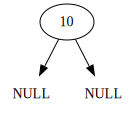

In [7]:
display(arraybintree.get_digraph_simple())

In [8]:
arraybintree.set_data(
    arraybintree.get_left_child_idx(0),
    5
)

In [9]:
print(arraybintree.array)

[   10     5 -9999 -9999 -9999 -9999 -9999]


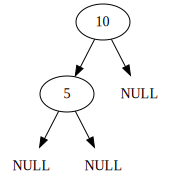

In [10]:
display(arraybintree.get_digraph_simple())

In [11]:
arraybintree.set_data(
    arraybintree.get_right_child_idx(0),
    19
)

In [12]:
print(arraybintree.array)

[   10     5    19 -9999 -9999 -9999 -9999]


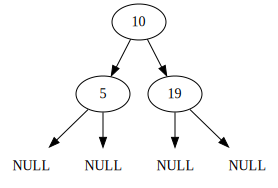

In [13]:
display(arraybintree.get_digraph_simple())

In [14]:
arraybintree.set_data(
    arraybintree.get_right_child_idx(arraybintree.get_left_child_idx(0)),
    37
)

In [15]:
print(arraybintree.array)

[   10     5    19 -9999    37 -9999 -9999]


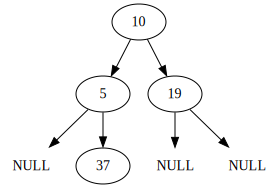

In [16]:
display(arraybintree.get_digraph_simple())

In [17]:
arraybintree.get_data(
    arraybintree.get_right_child_idx(arraybintree.get_left_child_idx(0))
)

37

In [18]:
arraybintree.array[5] = 98
arraybintree.array[6] = 62

In [19]:
print(arraybintree.array)

[   10     5    19 -9999    37    98    62]


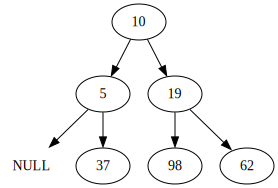

In [20]:
display(arraybintree.get_digraph_simple())

In [21]:
arraybintree.array[3] = 25

In [22]:
print(arraybintree.array)

[10  5 19 25 37 98 62]


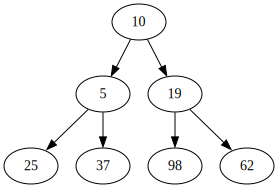

In [23]:
display(arraybintree.get_digraph_simple())

In [24]:
arraybintree.get_preorder()

[10, 5, 25, 37, 19, 98, 62]

In [25]:
arraybintree.get_inorder()

[25, 5, 37, 10, 98, 19, 62]

In [27]:
arraybintree.get_postorder()

[25, 37, 5, 98, 62, 19, 10]

## *Binary Tree* dengan *pointer*

In [30]:
class BintreeNode:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right

In [47]:
class LinkedBintree:
    def __init__(self):
        self.root = None

    def is_empty(self):
        if self.root == None:
            return True
        else:
            return False

    def get_root_data(self):
        if self.is_empty():
            print("Error get_root_data: tree sedang kosong")
            return None
        else:
            return self.root.data

    def set_root_data(self, newdata):
        if self.is_empty():
            self.root = BintreeNode(newdata)
        else:
            self.root.data = newdata

    def get_preorder(self, current=None, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            result.append(current)
            if current.left != None:
                self.get_preorder(current.left, result=result)
            if current.right != None:
                self.get_preorder(current.right, result=result)

        if is_starting_node:
            return result

    def get_inorder(self, current=None, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            if current.left != None:
                self.get_inorder(current.left, result=result)
            result.append(current)
            if current.right != None:
                self.get_inorder(current.right, result=result)

        if is_starting_node:
            return result

    def get_postorder(self, current=None, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            if current.left != None:
                self.get_postorder(current.left, result=result)
            if current.right != None:
                self.get_postorder(current.right, result=result)
            result.append(current)

        if is_starting_node:
            return result

    def get_digraph_simple(self, current=None, counter=None, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = gv.Digraph()
            current = self.root

            # pointer ke bilangan bulat (yang saat ini bernilai nol),
            # sebagai list dengan satu elemen
            counter = [0]
        
        if current != None:
            result.node("node" + str(counter[0]), label=str(self.root.data))
            counter[0] += 1
            result.edge()
            self.get_digraph_simple(
                current=current.left, counter=counter, result=result
            )
            self.get_digraph_simple(
                current=current.right, counter=counter, result=result
            )
        else:
            result.node("node" + str(counter[0]), label="NULL", shape="none")
            counter[0] += 1
        
        if is_starting_node:
            return result

In [48]:
linkedbintree = LinkedBintree()

In [49]:
print(linkedbintree.root)

None


In [50]:
linkedbintree.root = BintreeNode(26)

In [51]:
print(linkedbintree.root)

In [52]:
print(linkedbintree.root.data)

26


In [53]:
linkedbintree.root.left = BintreeNode(89)
linkedbintree.root.right = BintreeNode(54)

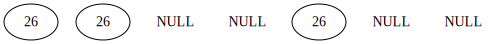

In [54]:
display(linkedbintree.get_digraph_simple())